###DATA606 Final Project

# Setup


In [1]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/DATA606_Final_Project/Datasets")

Mounted at /content/drive/


In [2]:
!pwd

/content/drive/My Drive/DATA606_Final_Project/Datasets


In [3]:
! ls -lsth

total 8.8G
1.0K -rw------- 1 root root  920 Apr 18 15:26  US_Language.csv
5.0K -rw------- 1 root root 5.0K Apr 18 14:51  COVID-cases.csv
2.0K -rw------- 1 root root 1.8K Mar 28 22:57  US_Political_Preference.csv
2.0K -rw------- 1 root root 1.8K Mar 28 22:33  US_Diversity.csv
1.0K -rw------- 1 root root  847 Mar 28 22:28  US_Population_Density.csv
1.0K -rw------- 1 root root  980 Mar 28 21:54  US_Population_Size.csv
1.0K -rw------- 1 root root  851 Mar 27 21:24  US_Poverty_Line.csv
1.0K -rw------- 1 root root  777 Mar 27 21:13  US_Unemployment_Rates.csv
1.0K -rw------- 1 root root  833 Mar 27 20:51  US_Voting_Rates.csv
1.0K -rw------- 1 root root  796 Mar 27 20:44  US_Life_Expectancy.csv
1.0K -rw------- 1 root root 1010 Mar 27 20:23  US_Religion.csv
1.0K -rw------- 1 root root  826 Mar 27 20:18  US_Health_Insurance.csv
 11M -rw------- 1 root root  11M Mar 27 18:01  COVID-19_Vaccinations.csv
6.1M -rw------- 1 root root 6.1M Mar 26 14:11 'U.S. & states, NAICS, detailed employment sizes (U

In [4]:
!pip install rfpimp
import numpy as np
import pandas as pd
from matplotlib.pyplot import pie, axis, show
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from rfpimp import permutation_importances
from sklearn.tree import DecisionTreeRegressor 

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=fa9abcf9e8d4ce1fa879c4e694a665274c48eb61c9914409fb0b7c64ca24407a
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


# Loading Datasets

In [5]:
#Load COVID-19 case and death data into a Pandas dataframe
case_data = pd.read_csv ("COVID-cases.csv", header=0, engine='python')
case_data

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,4/1/22,MO,1411722,NaN,NaN,1,0,19993,NaN,NaN,0,0,4/2/22 13:21,Not agree,Not agree
1,4/1/22,GU,47330,NaN,NaN,19,0,349,NaN,NaN,0,0,4/2/22 13:21,Not agree,Not agree
2,4/1/22,NV,713505,"658,403","55,102",218,22,10125,NaN,NaN,18,0,4/2/22 13:21,Agree,NaN
3,4/1/22,MT,272621,"212,314","60,307",66,24,3249,"3,249",0,2,0,4/2/22 13:21,Agree,Agree
4,4/1/22,CT,737276,"660,569","76,707",501,56,10779,"8,830","1,949",3,2,4/2/22 13:21,Agree,Agree
5,4/1/22,NE,477724,"336,279","141,445",1,0,4162,"3,410",752,0,0,4/2/22 13:21,Agree,Agree
6,4/1/22,WA,1456733,NaN,NaN,876,144,12510,NaN,NaN,16,0,4/3/22 0:00,NaN,NaN
7,4/1/22,CA,9095256,"8,494,005","601,251","4,026",0,88207,NaN,NaN,92,0,4/2/22 13:21,Agree,Not agree
8,4/1/22,ND,239861,"180,092","59,769",47,22,2246,NaN,NaN,1,0,4/2/22 13:21,Agree,Not agree
9,4/1/22,IL,3069650,"3,069,650",0,"1,413",0,37684,"33,394","4,290",17,0,4/2/22 13:21,Agree,Agree


In [6]:
case_data_new= case_data.replace({'state':{"AL":"Alabama", "AK":"Alaska", "AZ":"Arizona", "AR":"Arkansas", "CA":"California", "CO":"Colorado", "CT":"Connecticut", "DE":"Delaware", "DC":"District of Columbia", "FL":"Florida", "GA":"Georgia", "HI":"Hawaii", "ID":"Idaho", "IL":"Illinois", "IN":"Indiana", "IA":"Iowa", "KS":"Kansas", "KY":"Kentucky", "LA":"Louisiana", "ME":"Maine", "MD":"Maryland", "MA":"Massachusetts", "MI":"Michigan", "MN":"Minnesota", "MS":"Mississippi", "MO":"Missouri", "MT":"Montana", "NE":"Nebraska", "NV":"Nevada", "NH":"New Hampshire", "NJ":"New Jersey", "NM":"New Mexico", "NY":"New York", "NC":"North Carolina", "ND":"North Dakota", "OH":"Ohio",  "OK":"Oklahoma", "OR":"Oregon", "PA":"Pennsylvania", "RI":"Rhode Island", "SC":"South Carolina", "SD":"South Dakota", "TN":"Tennessee", "TX":"Texas", "UT":"Utah", "VT":"Vermont", "VA":"Virginia", "WA":"Washington", "WV":"West Virginia", "WI":"Wisconsin", "WY":"Wyoming"}})

In [7]:
case_data = case_data_new[case_data_new["state"].str.contains("PW|BP2|FM|VA2|US|IH2|DD2|MH|RP|LTC|PR|VI|MP|AS|GU|NYC|RMI|FSM") == False]
case_data

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,4/1/22,Missouri,1411722,NaN,NaN,1,0,19993,NaN,NaN,0,0,4/2/22 13:21,Not agree,Not agree
2,4/1/22,Nevada,713505,"658,403","55,102",218,22,10125,NaN,NaN,18,0,4/2/22 13:21,Agree,NaN
3,4/1/22,Montana,272621,"212,314","60,307",66,24,3249,"3,249",0,2,0,4/2/22 13:21,Agree,Agree
4,4/1/22,Connecticut,737276,"660,569","76,707",501,56,10779,"8,830","1,949",3,2,4/2/22 13:21,Agree,Agree
5,4/1/22,Nebraska,477724,"336,279","141,445",1,0,4162,"3,410",752,0,0,4/2/22 13:21,Agree,Agree
6,4/1/22,Washington,1456733,NaN,NaN,876,144,12510,NaN,NaN,16,0,4/3/22 0:00,NaN,NaN
7,4/1/22,California,9095256,"8,494,005","601,251","4,026",0,88207,NaN,NaN,92,0,4/2/22 13:21,Agree,Not agree
8,4/1/22,North Dakota,239861,"180,092","59,769",47,22,2246,NaN,NaN,1,0,4/2/22 13:21,Agree,Not agree
9,4/1/22,Illinois,3069650,"3,069,650",0,"1,413",0,37684,"33,394","4,290",17,0,4/2/22 13:21,Agree,Agree
10,4/1/22,Mississippi,794721,"436,748","357,973",163,86,12399,"8,167","4,232",2,0,4/2/22 13:21,Agree,Agree


In [8]:
Total_Cases = case_data.groupby('state')['tot_cases'].sum()
Total_Cases

state
Alabama                 1295625
Alaska                   239750
Arizona                 2007180
Arkansas                 833029
California              9095256
Colorado                1357240
Connecticut              737276
Delaware                 259746
District of Columbia     136886
Florida                 5853067
Georgia                 2500259
Hawaii                   234659
Idaho                    444210
Illinois                3069650
Indiana                 1691470
Iowa                     759048
Kansas                   770275
Kentucky                1318063
Louisiana               1168537
Maine                    236259
Maryland                1012822
Massachusetts           1700361
Michigan                2389506
Minnesota               1430089
Mississippi              794721
Missouri                1411722
Montana                  272621
Nebraska                 477724
Nevada                   713505
New Hampshire            302678
New Jersey              2201324
Ne

In [9]:
Total_Deaths = case_data.groupby('state')['tot_death'].sum()
Total_Deaths

state
Alabama                 19467
Alaska                   1195
Arizona                 29268
Arkansas                11237
California              88207
Colorado                11977
Connecticut             10779
Delaware                 2846
District of Columbia     1333
Florida                 73589
Georgia                 37057
Hawaii                   1367
Idaho                    4876
Illinois                37684
Indiana                 23431
Iowa                     9445
Kansas                   8397
Kentucky                15219
Louisiana               17138
Maine                    2202
Maryland                14355
Massachusetts           20115
Michigan                35706
Minnesota               12640
Mississippi             12399
Missouri                19993
Montana                  3249
Nebraska                 4162
Nevada                  10125
New Hampshire            2452
New Jersey              33238
New Mexico               7279
New York                27243
Nort

In [10]:
#Load COVID-19 vaccination data into a Pandas dataframe
vaccination_data = pd.read_csv ("COVID-19_Vaccinations.csv", header=0, engine='python')
vaccination_data

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,...,Administered_Dose1_Recip_5PlusPop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Administered_5Plus,Admin_Per_100k_5Plus,Distributed_Per_100k_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Janssen_5Plus,Series_Complete_Unk_Manuf_5Plus
0,3/6/22,10,TN,12306130,506300,4696440,7103390,0,180199,210881,...,65.3,3667031.0,57.1,9623482.0,149885.0,191667.0,1304771.0,2117585.0,232993.0,11682.0
1,3/6/22,10,WI,11118845,450600,4143700,6524545,0,190966,222386,...,75.4,3769241.0,68.6,9896981.0,180209.0,202458.0,1324677.0,2145001.0,298752.0,811.0
2,3/6/22,10,AZ,14144720,604600,5417620,8122500,0,194330,227918,...,76.1,4388926.0,64.1,11594879.0,169295.0,206525.0,1618568.0,2434773.0,328801.0,6784.0
3,3/6/22,10,NC,20963500,918100,7895960,12149440,0,199879,233303,...,87.6,6238211.0,63.2,16171385.0,163706.0,212217.0,2161219.0,3597550.0,479295.0,147.0
4,3/6/22,10,NM,4264445,186300,1662500,2415645,0,203376,238580,...,91.5,1464456.0,74.1,3783363.0,191481.0,215829.0,555171.0,798674.0,108431.0,2180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28947,12/13/20,51,VI,975,0,0,0,0,931,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
28948,12/13/20,51,US,13650,0,0,0,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
28949,12/13/20,51,GU,3900,0,0,0,0,2353,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
28950,12/13/20,51,MP,4875,0,0,0,0,8570,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
COVID_vaccine_data= vaccination_data.replace({'Location':{"AL":"Alabama", "AK":"Alaska", "AZ":"Arizona", "AR":"Arkansas", "CA":"California", "CO":"Colorado", "CT":"Connecticut", "DE":"Delaware", "DC":"District of Columbia", "FL":"Florida", "GA":"Georgia", "HI":"Hawaii", "ID":"Idaho", "IL":"Illinois", "IN":"Indiana", "IA":"Iowa", "KS":"Kansas", "KY":"Kentucky", "LA":"Louisiana", "ME":"Maine", "MD":"Maryland", "MA":"Massachusetts", "MI":"Michigan", "MN":"Minnesota", "MS":"Mississippi", "MO":"Missouri", "MT":"Montana", "NE":"Nebraska", "NV":"Nevada", "NH":"New Hampshire", "NJ":"New Jersey", "NM":"New Mexico", "NY":"New York", "NC":"North Carolina", "ND":"North Dakota", "OH":"Ohio",  "OK":"Oklahoma", "OR":"Oregon", "PA":"Pennsylvania", "RI":"Rhode Island", "SC":"South Carolina", "SD":"South Dakota", "TN":"Tennessee", "TX":"Texas", "UT":"Utah", "VT":"Vermont", "VA":"Virginia", "WA":"Washington", "WV":"West Virginia", "WI":"Wisconsin", "WY":"Wyoming"}})

In [12]:
vaccine_data = COVID_vaccine_data[COVID_vaccine_data["Location"].str.contains("PW|BP2|FM|VA2|US|IH2|DD2|MH|RP|LTC|PR|VI|MP|AS|GU") == False]
vaccine_data

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,...,Administered_Dose1_Recip_5PlusPop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Administered_5Plus,Admin_Per_100k_5Plus,Distributed_Per_100k_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Janssen_5Plus,Series_Complete_Unk_Manuf_5Plus
0,3/6/22,10,Tennessee,12306130,506300,4696440,7103390,0,180199,210881,...,65.3,3667031.0,57.1,9623482.0,149885.0,191667.0,1304771.0,2117585.0,232993.0,11682.0
1,3/6/22,10,Wisconsin,11118845,450600,4143700,6524545,0,190966,222386,...,75.4,3769241.0,68.6,9896981.0,180209.0,202458.0,1324677.0,2145001.0,298752.0,811.0
2,3/6/22,10,Arizona,14144720,604600,5417620,8122500,0,194330,227918,...,76.1,4388926.0,64.1,11594879.0,169295.0,206525.0,1618568.0,2434773.0,328801.0,6784.0
3,3/6/22,10,North Carolina,20963500,918100,7895960,12149440,0,199879,233303,...,87.6,6238211.0,63.2,16171385.0,163706.0,212217.0,2161219.0,3597550.0,479295.0,147.0
4,3/6/22,10,New Mexico,4264445,186300,1662500,2415645,0,203376,238580,...,91.5,1464456.0,74.1,3783363.0,191481.0,215829.0,555171.0,798674.0,108431.0,2180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28941,12/14/20,51,Illinois,47775,0,0,0,0,377,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
28942,12/14/20,51,Maine,1950,0,0,0,0,145,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
28943,12/14/20,51,California,33150,0,0,0,0,84,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
28944,12/14/20,51,Massachusetts,5850,0,0,0,0,85,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
Distributed_Vaccines = vaccine_data.groupby('Location')['Distributed'].sum()
Distributed_Vaccines

Location
Alabama                  2275441345
Alaska                    384874350
Arizona                  3543198595
Arkansas                 1406831195
California              21133646525
Colorado                 2988241055
Connecticut              2054308960
Delaware                  550500295
District of Columbia      446368010
Florida                 11337895685
Georgia                  5080061250
Hawaii                    830013465
Idaho                     787168725
Illinois                 6440097355
Indiana                  3023759430
Iowa                     1537772635
Kansas                   1410596455
Kentucky                 2062103570
Louisiana                1973453955
Maine                     787546025
Maryland                 3597943740
Massachusetts            4025719000
Michigan                 4970226340
Minnesota                2880065115
Mississippi              1304023215
Missouri                 2774853155
Montana                   489702310
Nebraska           

In [14]:
Distributed_Vaccines_Moderna = vaccine_data.groupby('Location')['Distributed_Moderna'].sum()
Distributed_Vaccines_Moderna

Location
Alabama                  982802080
Alaska                   150904600
Arizona                 1396600560
Arkansas                 592406540
California              7971153320
Colorado                1154434680
Connecticut              797475080
Delaware                 216005360
District of Columbia     166251820
Florida                 4306405280
Georgia                 2031968180
Hawaii                   310817680
Idaho                    310945880
Illinois                2369145100
Indiana                 1117541860
Iowa                     604201280
Kansas                   566615700
Kentucky                 857631580
Louisiana                808836340
Maine                    319834200
Maryland                1315821000
Massachusetts           1558747200
Michigan                1990337640
Minnesota               1070659520
Mississippi              534726340
Missouri                1067823280
Montana                  205251660
Nebraska                 345646480
Nevada     

In [15]:
Distributed_Vaccines_Pfizer = vaccine_data.groupby('Location')['Distributed_Pfizer'].sum()
Distributed_Vaccines_Pfizer

Location
Alabama                  1136208070
Alaska                    196586985
Arizona                  1906467720
Arkansas                  712360510
California              11744345855
Colorado                 1640176965
Connecticut              1119446305
Delaware                  299198805
District of Columbia      250547195
Florida                  6162522005
Georgia                  2716668635
Hawaii                    468893400
Idaho                     418789210
Illinois                 3624103615
Indiana                  1674926970
Iowa                      826964415
Kansas                    745258465
Kentucky                 1056392825
Louisiana                1026260150
Maine                     411223200
Maryland                 2053784860
Massachusetts            2222125060
Michigan                 2629072750
Minnesota                1616694780
Mississippi               676707355
Missouri                 1530133165
Montana                   245436005
Nebraska           

In [16]:
Distributed_Vaccines_Janssen = vaccine_data.groupby('Location')['Distributed_Janssen'].sum()
Distributed_Vaccines_Janssen

Location
Alabama                  108379600
Alaska                    23185100
Arizona                  165395000
Arkansas                  69078500
California              1001055400
Colorado                 132152800
Connecticut               94817600
Delaware                  24981600
District of Columbia      19955000
Florida                  636700900
Georgia                  225529000
Hawaii                    33076300
Idaho                     40578400
Illinois                 320588800
Indiana                  160765900
Iowa                      75391200
Kansas                    68114800
Kentucky                 102517300
Louisiana                 90651500
Maine                     40914200
Maryland                 163889700
Massachusetts            168799200
Michigan                 248966600
Minnesota                133871400
Mississippi               62464900
Missouri                 117701500
Montana                   27913700
Nebraska                  41771100
Nevada     

In [17]:
Percentage_Moderna = Distributed_Vaccines_Moderna / Distributed_Vaccines *100
print(Percentage_Moderna)

Location
Alabama                 43.191712
Alaska                  39.208796
Arizona                 39.416378
Arkansas                42.109284
California              37.717832
Colorado                38.632582
Connecticut             38.819627
Delaware                39.238010
District of Columbia    37.245460
Florida                 37.982403
Georgia                 39.998891
Hawaii                  37.447306
Idaho                   39.501808
Illinois                36.787411
Indiana                 36.958690
Iowa                    39.290677
Kansas                  40.168519
Kentucky                41.590131
Louisiana               40.985823
Maine                   40.611493
Maryland                36.571472
Massachusetts           38.719722
Michigan                40.045211
Minnesota               37.174837
Mississippi             41.005891
Missouri                38.482155
Montana                 41.913558
Nebraska                36.956944
Nevada                  36.384239
New H

In [18]:
Percentage_Pfizer = Distributed_Vaccines_Pfizer / Distributed_Vaccines *100
print(Percentage_Pfizer)

Location
Alabama                 49.933525
Alaska                  51.078225
Arizona                 53.806403
Arkansas                50.635820
California              55.571791
Colorado                54.887706
Connecticut             54.492597
Delaware                54.350344
District of Columbia    56.130186
Florida                 54.353314
Georgia                 53.477084
Hawaii                  56.492264
Idaho                   53.201963
Illinois                56.274050
Indiana                 55.392203
Iowa                    53.776768
Kansas                  52.832861
Kentucky                51.228893
Louisiana               52.003248
Maine                   52.215767
Maryland                57.082184
Massachusetts           55.198216
Michigan                52.896439
Minnesota               56.133966
Mississippi             51.893812
Missouri                55.142852
Montana                 50.119430
Nebraska                56.242313
Nevada                  56.580852
New H

In [19]:
Percentage_Janssen = Distributed_Vaccines_Janssen / Distributed_Vaccines *100
print(Percentage_Janssen)

Location
Alabama                 4.763014
Alaska                  6.024070
Arizona                 4.667957
Arkansas                4.910220
California              4.736785
Colorado                4.422428
Connecticut             4.615547
Delaware                4.537981
District of Columbia    4.470526
Florida                 5.615688
Georgia                 4.439494
Hawaii                  3.985032
Idaho                   5.154981
Illinois                4.978012
Indiana                 5.316756
Iowa                    4.902623
Kansas                  4.828794
Kentucky                4.971491
Louisiana               4.593545
Maine                   5.195150
Maryland                4.555093
Massachusetts           4.193020
Michigan                5.009160
Minnesota               4.648207
Mississippi             4.790168
Missouri                4.241720
Montana                 5.700136
Nebraska                4.466217
Nevada                  5.000141
New Hampshire           5.740761
N

In [20]:
vaccine_percentage_results = pd.concat([Percentage_Moderna, Percentage_Pfizer, Percentage_Janssen], axis=1, join="inner")
vaccine_percentage_results.columns = ["Moderna", "Pfizer", "Janssen"]
vaccine_percentage_results.index.name = "State"
vaccine_percentage_results

,Moderna,Pfizer,Janssen
State,,,
Alabama,43.191712,49.933525,4.763014
Alaska,39.208796,51.078225,6.024070
Arizona,39.416378,53.806403,4.667957
Arkansas,42.109284,50.635820,4.910220
California,37.717832,55.571791,4.736785
Colorado,38.632582,54.887706,4.422428
Connecticut,38.819627,54.492597,4.615547
Delaware,39.238010,54.350344,4.537981
District of Columbia,37.245460,56.130186,4.470526


In [21]:
#Load religion data into a Pandas dataframe
religion_data = pd.read_csv ("US_Religion.csv", header=0, index_col=0, engine='python')
religion_data.columns = ["Christian (Percentage)", "Jewish (Percentage)"]
religion_data.index.name = "State"
religion_data

,Christian (Percentage),Jewish (Percentage)
State,,
Alabama,54.4,0.2
Alaska,33.6,0.9
Arizona,37.9,1.7
Arkansas,56.7,0.1
California,42.3,3.3
Colorado,37.3,1.8
Connecticut,53.7,3.3
Delaware,38.2,1.7
District of Columbia,57.8,4.7


In [22]:
#Load health insurance data into a Pandas dataframe
health_insurance_data = pd.read_csv ("US_Health_Insurance.csv", header=0, index_col=0, engine='python')
health_insurance_data.columns = ["Population Insured (Percentage)"]
health_insurance_data

,Population Insured (Percentage)
State,
Alabama,85.2
Alaska,81.0
Arizona,82.0
Arkansas,81.6
California,82.1
Colorado,86.3
Connecticut,91.9
Delaware,89.2
District of Columbia,92.1


In [23]:
#Load life expectancy data into a Pandas dataframe
life_expectancy_data = pd.read_csv ("US_Life_Expectancy.csv", header=0, index_col=0, engine='python')
life_expectancy_data

,Average Life Expectancy (years)
State,
Alabama,75.2
Alaska,77.7
Arizona,78.8
Arkansas,75.7
California,80.9
Colorado,80.0
Connecticut,80.3
Delaware,78.1
Florida,79.0


In [24]:
#Load voting rates data into a Pandas dataframe
voting_rates_data = pd.read_csv ("US_Voting_Rates.csv", header=0, index_col=0, engine='python')
voting_rates_data

,Voting Rates (Percentage)
State,
Alabama,59.6
Alaska,62.4
Arizona,64.7
Arkansas,51.9
California,55.7
Colorado,62.7
Connecticut,60.5
Delaware,63.8
District of Columbia,77.8


In [25]:
#Load unemployment rates data into a Pandas dataframe
unemployment_rates_data = pd.read_csv ("US_Unemployment_Rates.csv", header=0, index_col=0, engine='python')
unemployment_rates_data

,Unemployment Rate (Percentage)
State,
Alabama,3.0
Alaska,5.4
Arizona,3.6
Arkansas,3.1
California,5.4
Colorado,4.0
Connecticut,4.9
Delaware,4.6
District of Columbia,6.1


In [26]:
#Load below poverty line data into a Pandas dataframe
below_poverty_line_data = pd.read_csv ("US_Poverty_Line.csv", header=0, index_col=0, engine='python')
below_poverty_line_data

,Percentage of Population Below Poverty Line
State,
Alabama,33.0
Alaska,28.3
Arizona,29.7
Arkansas,33.4
California,27.1
Colorado,21.9
Connecticut,22.7
Delaware,29.1
District of Columbia,27.1


In [27]:
#Load population size data into a Pandas dataframe
population_size_data = pd.read_csv ("US_Population_Size.csv", header=0, index_col=0, engine='python')
population_size_data

,Population Size
State,
Alabama,5039877
Alaska,732673
Arizona,7276316
Arkansas,3025891
California,39237836
Colorado,5812069
Connecticut,3605597
Delaware,1003384
District of Columbia,670050


In [28]:
#Load language data into a Pandas dataframe
language_data = pd.read_csv ("US_Language.csv", header=0, index_col=0, engine='python')
language_data

,Percentage of population who do not speak English very well
State,
Alabama,2.069
Alaska,6.003
Arizona,10.735
Arkansas,3.121
California,19.844
Colorado,7.094
Connecticut,7.973
Delaware,4.446
District of Columbia,4.043


In [29]:
#Load population density data into a Pandas dataframe
population_density_data = pd.read_csv ("US_Population_Density.csv", header=0, index_col=0, engine='python')
population_density_data

,Population per Square Mile
State,
Alabama,94.4
Alaska,1.2
Arizona,56.3
Arkansas,56.0
California,239.1
Colorado,48.5
Connecticut,738.1
Delaware,460.8
District of Columbia,9856.5


In [30]:
#Load diversity data into a Pandas dataframe
diversity_data = pd.read_csv ("US_Diversity.csv", header=0, index_col=0, engine='python')
diversity_data

,Percent White,Percent Black or African American,"Percent American Indian, Alaska Native",Percent Asian,Percent Native Hawaiian and Other Pacific Islander
State,,,,,
Alabama,68.5,26.2,0.6,1.1,0.1
Alaska,66.7,3.3,14.8,5.4,1.0
Arizona,73.0,4.1,4.6,2.8,0.2
Arkansas,77.0,15.4,0.8,1.2,0.2
California,57.6,6.2,1.0,13.0,0.4
Colorado,81.3,4.0,1.1,2.8,0.1
Connecticut,77.6,10.1,0.3,3.8,0.0
Delaware,68.9,21.4,0.5,3.2,0.0
District of Columbia,38.5,50.7,0.3,3.5,0.1


In [31]:
#Load political party data into a Pandas dataframe
political_party_data = pd.read_csv ("US_Political_Preference.csv", header=0, index_col=0, engine='python')
political_party_data

,Percent of Vote for Democratic Party,Percent of Vote for Republican Party
State,,
Alabama,36.569990,62.031643
Alaska,42.771952,52.833143
Arizona,49.364691,49.055981
Arkansas,34.775062,62.395730
California,63.483947,34.320724
Colorado,55.011067,41.604126
Connecticut,59.260732,39.187118
Delaware,58.743006,39.774877
District of Columbia,92.149694,5.397321


# Visualizations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

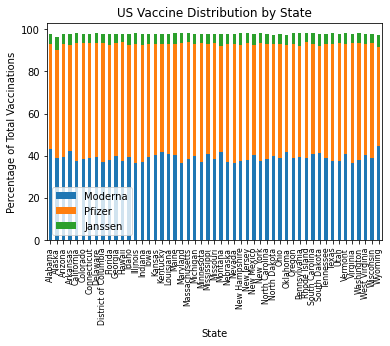

In [32]:
vaccine_percentage_results.plot(kind="bar", stacked=True)
plt.title("US Vaccine Distribution by State")
plt.xlabel("State")
plt.ylabel("Percentage of Total Vaccinations")
plt.xticks(fontsize = 7.75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

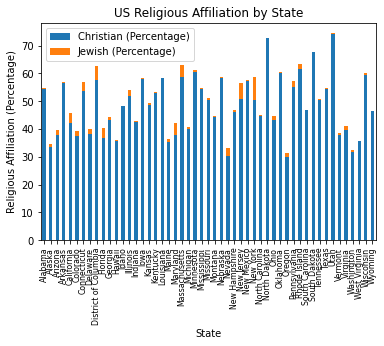

In [33]:
religion_data.plot(kind="bar", stacked=True)
plt.title("US Religious Affiliation by State")
plt.xlabel("State")
plt.ylabel("Religious Affiliation (Percentage)")
plt.xticks(fontsize = 7.75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

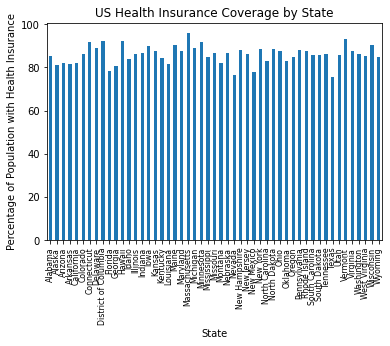

In [34]:
health_insurance_data.plot(kind="bar", stacked=True, legend=None)
plt.title("US Health Insurance Coverage by State")
plt.xlabel("State")
plt.ylabel("Percentage of Population with Health Insurance")
plt.xticks(fontsize = 7.75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

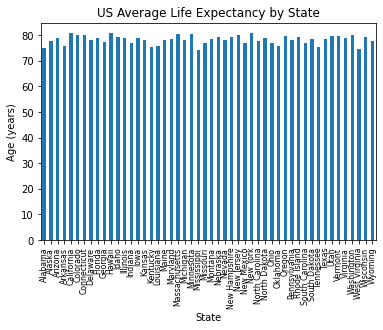

In [35]:
life_expectancy_data.plot(kind="bar", stacked=True, legend=None)
plt.title("US Average Life Expectancy by State")
plt.xlabel("State")
plt.ylabel("Age (years)")
plt.xticks(fontsize = 7.75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

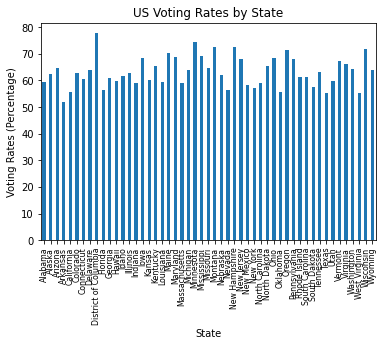

In [36]:
voting_rates_data.plot(kind="bar", stacked=True, legend=None)
plt.title("US Voting Rates by State")
plt.xlabel("State")
plt.ylabel("Voting Rates (Percentage)")
plt.xticks(fontsize = 7.75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

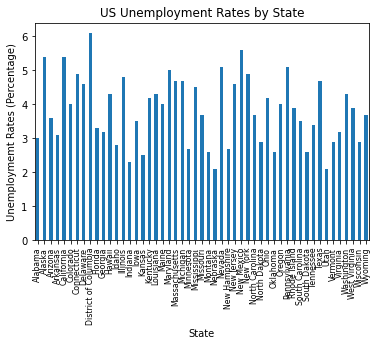

In [37]:
unemployment_rates_data.plot(kind="bar", stacked=True, legend=None)
plt.title("US Unemployment Rates by State")
plt.xlabel("State")
plt.ylabel("Unemploymemt Rates (Percentage)")
plt.xticks(fontsize = 7.75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

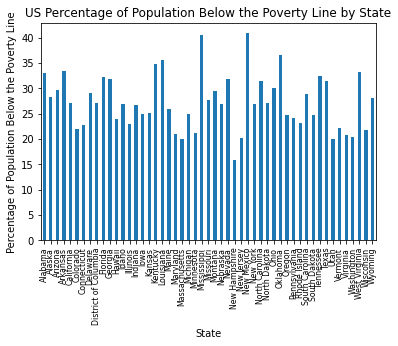

In [38]:
below_poverty_line_data.plot(kind="bar", stacked=True, legend=None)
plt.title("US Percentage of Population Below the Poverty Line by State")
plt.xlabel("State")
plt.ylabel("Percentage of Population Below the Poverty Line")
plt.xticks(fontsize = 7.75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

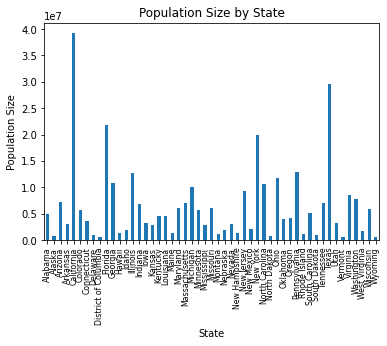

In [39]:
population_size_data.plot(kind="bar", stacked=True, legend=None)
plt.title("Population Size by State")
plt.xlabel("State")
plt.ylabel("Population Size")
plt.xticks(fontsize = 7.75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

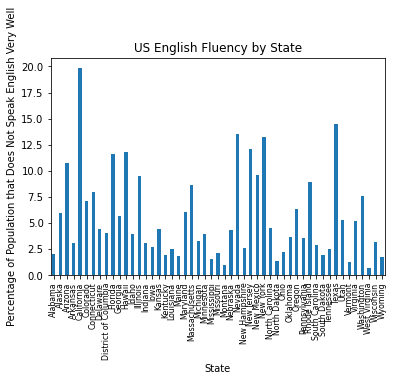

In [40]:
language_data.plot(kind="bar", stacked=True, legend=None)
plt.title("US English Fluency by State")
plt.xlabel("State")
plt.ylabel("Percentage of Population that Does Not Speak English Very Well")
plt.xticks(fontsize = 7.75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

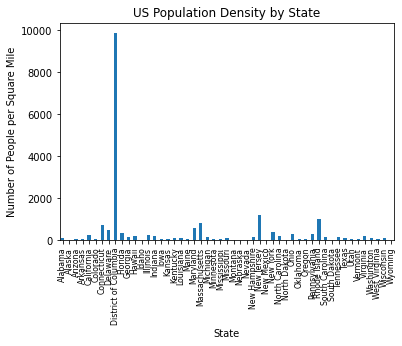

In [41]:
population_density_data.plot(kind="bar", stacked=True, legend=None)
plt.title("US Population Density by State")
plt.xlabel("State")
plt.ylabel("Number of People per Square Mile")
plt.xticks(fontsize = 7.75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

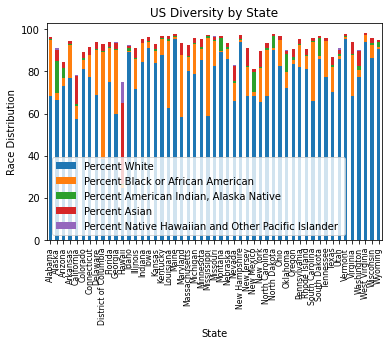

In [42]:
diversity_data.plot(kind="bar", stacked=True)
plt.title("US Diversity by State")
plt.xlabel("State")
plt.ylabel("Race Distribution")
plt.xticks(fontsize = 7.75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

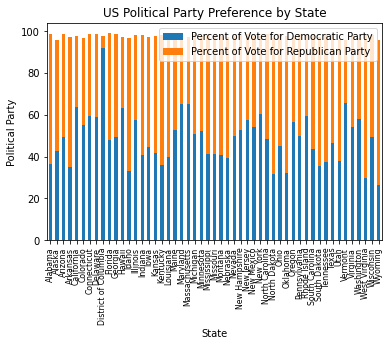

In [43]:
political_party_data.plot(kind="bar", stacked=True)
plt.title("US Political Party Preference by State")
plt.xlabel("State")
plt.ylabel("Political Party")
plt.xticks(fontsize = 7.75)

# Creating and Exploring New Table

In [44]:
#Create a comprehensive table
final_table = pd.concat([vaccine_percentage_results, health_insurance_data, religion_data, life_expectancy_data, voting_rates_data, unemployment_rates_data, below_poverty_line_data, population_size_data, language_data, population_density_data, diversity_data, political_party_data, Total_Cases, Total_Deaths], axis=1, join="inner")
final_table

,Moderna,Pfizer,Janssen,Population Insured (Percentage),Christian (Percentage),Jewish (Percentage),Average Life Expectancy (years),Voting Rates (Percentage),Unemployment Rate (Percentage),Percentage of Population Below Poverty Line,...,Population per Square Mile,Percent White,Percent Black or African American,"Percent American Indian, Alaska Native",Percent Asian,Percent Native Hawaiian and Other Pacific Islander,Percent of Vote for Democratic Party,Percent of Vote for Republican Party,tot_cases,tot_death
Alabama,43.191712,49.933525,4.763014,85.2,54.4,0.2,75.2,59.6,3.0,33.0,...,94.4,68.5,26.2,0.6,1.1,0.1,36.569990,62.031643,1295625,19467
Alaska,39.208796,51.078225,6.024070,81.0,33.6,0.9,77.7,62.4,5.4,28.3,...,1.2,66.7,3.3,14.8,5.4,1.0,42.771952,52.833143,239750,1195
Arizona,39.416378,53.806403,4.667957,82.0,37.9,1.7,78.8,64.7,3.6,29.7,...,56.3,73.0,4.1,4.6,2.8,0.2,49.364691,49.055981,2007180,29268
Arkansas,42.109284,50.635820,4.910220,81.6,56.7,0.1,75.7,51.9,3.1,33.4,...,56.0,77.0,15.4,0.8,1.2,0.2,34.775062,62.395730,833029,11237
California,37.717832,55.571791,4.736785,82.1,42.3,3.3,80.9,55.7,5.4,27.1,...,239.1,57.6,6.2,1.0,13.0,0.4,63.483947,34.320724,9095256,88207
Colorado,38.632582,54.887706,4.422428,86.3,37.3,1.8,80.0,62.7,4.0,21.9,...,48.5,81.3,4.0,1.1,2.8,0.1,55.011067,41.604126,1357240,11977
Connecticut,38.819627,54.492597,4.615547,91.9,53.7,3.3,80.3,60.5,4.9,22.7,...,738.1,77.6,10.1,0.3,3.8,0.0,59.260732,39.187118,737276,10779
Delaware,39.238010,54.350344,4.537981,89.2,38.2,1.7,78.1,63.8,4.6,29.1,...,460.8,68.9,21.4,0.5,3.2,0.0,58.743006,39.774877,259746,2846
Florida,37.982403,54.353314,5.615688,78.5,36.9,3.3,79.0,56.4,3.3,32.3,...,350.6,75.0,16.0,0.4,2.4,0.1,47.861451,51.219820,5853067,73589
Georgia,39.998891,53.477084,4.439494,80.8,43.1,1.3,77.4,60.9,3.2,31.9,...,168.4,59.7,30.5,0.3,3.2,0.1,49.473056,49.237474,2500259,37057


In [45]:
final_table.shape

(50, 22)

In [46]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 22 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Moderna                                                      50 non-null     float64
 1   Pfizer                                                       50 non-null     float64
 2   Janssen                                                      50 non-null     float64
 3   Population Insured (Percentage)                              50 non-null     float64
 4   Christian (Percentage)                                       50 non-null     float64
 5   Jewish (Percentage)                                          50 non-null     float64
 6   Average Life Expectancy (years)                              50 non-null     float64
 7   Voting Rates (Percentage)                                    50 non-null    

In [47]:
final_table.describe()

,Moderna,Pfizer,Janssen,Population Insured (Percentage),Christian (Percentage),Jewish (Percentage),Average Life Expectancy (years),Voting Rates (Percentage),Unemployment Rate (Percentage),Percentage of Population Below Poverty Line,...,Population per Square Mile,Percent White,Percent Black or African American,"Percent American Indian, Alaska Native",Percent Asian,Percent Native Hawaiian and Other Pacific Islander,Percent of Vote for Democratic Party,Percent of Vote for Republican Party,tot_cases,tot_death
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,39.272588,53.745664,4.844231,85.822000,48.340000,1.302000,78.268000,62.944000,3.794000,27.282000,...,194.962000,76.742000,10.330000,1.740000,3.684000,0.326000,47.694119,50.032479,1.539610e+06,18669.500000
std,1.826983,2.133175,0.450002,4.177798,10.749162,1.644346,1.704549,5.335448,0.951993,5.504421,...,261.091465,12.935225,9.557138,2.949922,5.585709,1.412453,10.356938,10.356432,1.695653e+06,19951.907628
min,36.384239,47.122223,3.923880,75.400000,30.100000,0.000000,74.400000,51.900000,2.100000,15.800000,...,1.200000,24.700000,0.400000,0.200000,0.600000,0.000000,26.387867,30.381057,1.082490e+05,587.000000
25%,37.808226,52.273528,4.545056,83.125000,38.575000,0.200000,77.100000,59.025000,2.925000,22.975000,...,44.450000,68.525000,3.000000,0.325000,1.325000,0.000000,40.025935,41.448424,4.827590e+05,4759.750000
50%,39.115651,54.090123,4.793336,86.200000,48.450000,0.750000,78.450000,62.550000,3.800000,26.900000,...,98.750000,78.250000,7.000000,0.600000,2.250000,0.100000,48.975451,49.585903,1.101488e+06,12575.000000
75%,40.464008,55.397948,5.006905,88.000000,56.275000,1.700000,79.500000,67.125000,4.600000,31.400000,...,209.500000,86.050000,15.175000,1.200000,3.800000,0.100000,56.092756,57.998118,1.930475e+06,23386.750000
max,44.664366,57.082184,6.024070,95.900000,74.300000,8.400000,80.900000,74.300000,5.600000,40.900000,...,1195.500000,95.300000,37.000000,14.800000,38.600000,10.000000,65.455781,69.499790,9.095256e+06,88207.000000


# Correlation Matrix

In [48]:
#Create a correlation matrix for the data
Correlation_Matrix = final_table.corr()
print (Correlation_Matrix)

                                                     Moderna    Pfizer  \
Moderna                                             1.000000 -0.962127   
Pfizer                                             -0.962127  1.000000   
Janssen                                             0.250785 -0.474692   
Population Insured (Percentage)                    -0.100878  0.196758   
Christian (Percentage)                              0.169388 -0.109261   
Jewish (Percentage)                                -0.440565  0.459984   
Average Life Expectancy (years)                    -0.556730  0.556524   
Voting Rates (Percentage)                          -0.031250  0.016195   
Unemployment Rate (Percentage)                     -0.174430  0.162747   
Percentage of Population Below Poverty Line         0.472567 -0.470878   
Population Size                                    -0.357796  0.346220   
Percentage of population who do not speak Engli... -0.549407  0.547825   
Population per Square Mile            

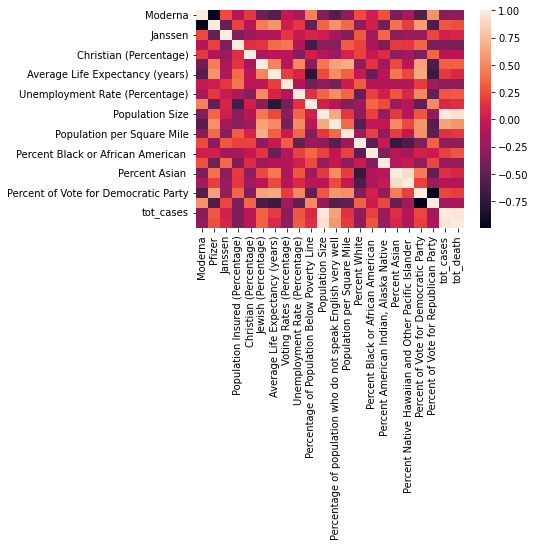

In [49]:
#Visualize the correlation matrix
sn.heatmap(Correlation_Matrix, annot=False)
plt.show()

# Multiple Linear Regression Model (Total Cases)

In [50]:
#Define the independent (x) and dependent (y) variables
x = final_table.drop(['tot_cases', 'tot_death'],axis=1)
y_case = final_table['tot_cases']

In [51]:
#Split training and testing data
x_train, x_test, y_train_case, y_test_case = train_test_split(x, y_case, test_size = 0.25, random_state = 42)

In [52]:
#Create the linear Regression model and fit the training data
LR_case = LinearRegression()
LR_case.fit(x_train,y_train_case)

LinearRegression()

In [53]:
#Use the linear regression model to predict the y_test values
y_prediction_case =  LR_case.predict(x_test)
y_prediction_case

array([2219736.7647821 , 1447420.74335366,  -91370.66827286,
       2027200.35074944,  964365.97725763, 1422532.26013298,
        848241.76743011,  337693.79731173, 2503375.33574796,
        793387.29091879, 2673818.34449368, 8153077.91239476,
       2227944.9280587 ])

In [54]:
#Determine the accuracy of the linear regression model
score_case=r2_score(y_test_case,y_prediction_case)
print("R squared Value: ",score_case)
print("Mean Squared Error Value",mean_squared_error(y_test_case,y_prediction_case))
print("Root Mean Squared Error Value",np.sqrt(mean_squared_error(y_test_case,y_prediction_case)))

R squared Value:  0.9613233779345891
Mean Squared Error Value 184927534875.87604
Root Mean Squared Error Value 430032.01610563375


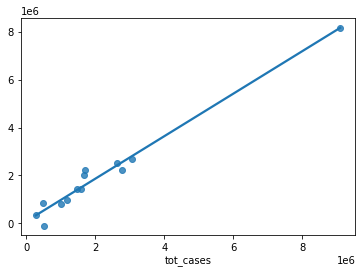

In [55]:
#Plot y_test vs. y_prediction
sn.regplot(x=y_test_case, y=y_prediction_case, ci=None)

# Multiple Linear Regression Model (Total Deaths)

In [56]:
#Define the independent (x) and dependent (y) variables
x = final_table.drop(['tot_cases', 'tot_death'],axis=1)
y_death = final_table['tot_death']

In [57]:
#Split training and testing data
x_train, x_test, y_train_death, y_test_death = train_test_split(x, y_death, test_size = 0.25, random_state = 42)

In [58]:
#Create the linear Regression model and fit the training data
LR_death = LinearRegression()
LR_death.fit(x_train,y_train_death)

LinearRegression()

In [59]:
#Use the linear regression model to predict the y_test values
y_prediction_death =  LR_death.predict(x_test)
y_prediction_death

array([ 25617.82324939,  22064.26985525,   1053.4200082 ,  24995.38042753,
        14626.48042651,  17797.22091225,   5998.07822686,   7361.29195199,
        33727.87573457,  10607.31796632,  32161.44707578, 100983.49098836,
        31253.19330736])

In [60]:
#Determine the accuracy of the linear regression model
score_death=r2_score(y_test_death,y_prediction_death)
print("R squared Value: ",score_death)
print("Mean Squared Error Value",mean_squared_error(y_test_death,y_prediction_death))
print("Root Mean Squared Error Value",np.sqrt(mean_squared_error(y_test_death,y_prediction_death)))

R squared Value:  0.8990783675397424
Mean Squared Error Value 47501605.81144664
Root Mean Squared Error Value 6892.1408728671995


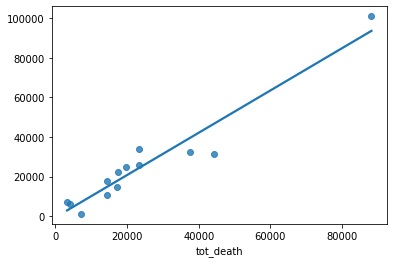

In [61]:
#Plot y_test vs. y_prediction
sn.regplot(x=y_test_death, y=y_prediction_death, ci=None)

# Random Forest Regression Model (Total Cases)

In [171]:
#Define the independent (x) and dependent (y) variables
x = final_table.drop(['tot_cases', 'tot_death'],axis=1)
y_case = final_table['tot_cases']

In [172]:
#Split training and testing data
x_train, x_test, y_train_case, y_test_case = train_test_split(x, y_case, test_size = 0.25, random_state = 42)

In [173]:
#Look at the shapes of your teating and training features and labels
print('x_train Shape:', x_train.shape)
print('y_train_case Shape:', y_train_case.shape)
print('x_test Shape:', x_test.shape)
print('y_test_case Shape:', y_test_case.shape)

x_train Shape: (37, 20)
y_train_case Shape: (37,)
x_test Shape: (13, 20)
y_test_case Shape: (13,)


In [174]:
#Use a for loop to create a list of decision tree classifiers all fitted to the training set that have varying n_estimators values 
trees = []
for d in range (1,65):
    trees.append(RandomForestRegressor(random_state=42, n_estimators=d).fit(x_train, y_train_case.ravel()))

In [175]:
#Use a function to look at the accuracy scores for the training and testing sets at each specific n_estimators value
def score(tree, x, y_case):
    return (tree.score(x, y_case))
for t in trees:
    print("For number of estimators equal to {}".format(t.get_params()["n_estimators"]))
    print("\tAccuracy on training set: {}".format(score(t, x_train, y_train_case)))
    print("\tAccuracy on test set: {}".format(score(t, x_test, y_test_case)))

For number of estimators equal to 1
	Accuracy on training set: 0.8467242642450613
	Accuracy on test set: 0.8101365801347946
For number of estimators equal to 2
	Accuracy on training set: 0.9194138477772194
	Accuracy on test set: 0.8307715056176204
For number of estimators equal to 3
	Accuracy on training set: 0.9619337280653752
	Accuracy on test set: 0.8366746227612095
For number of estimators equal to 4
	Accuracy on training set: 0.9229782421443804
	Accuracy on test set: 0.7264580165886028
For number of estimators equal to 5
	Accuracy on training set: 0.9418766457090944
	Accuracy on test set: 0.7401500281131754
For number of estimators equal to 6
	Accuracy on training set: 0.934850814287597
	Accuracy on test set: 0.7686302587815264
For number of estimators equal to 7
	Accuracy on training set: 0.9506212087438302
	Accuracy on test set: 0.773911692686975
For number of estimators equal to 8
	Accuracy on training set: 0.9584965947839966
	Accuracy on test set: 0.7748369511978768
For number

In [178]:
#Use a for loop to create a list of decision tree regressors all fitted to the training set that have varying max_depth values 
trees = []
for d in [1,2,3,4,5,6,7,8,9]:
    trees.append(RandomForestRegressor(random_state=42, n_estimators=3, max_depth=d).fit(x_train, y_train_case.ravel()))

In [179]:
#Use a function to look at the accuracy scores for the training and testing sets at each specific max_depth value
def score(tree, x, y_case):
    return (tree.score(x, y_case))
for t in trees:
    print("For max depth equal to {}".format(t.get_params()["max_depth"]))
    print("\tAccuracy on training set: {}".format(score(t, x_train, y_train_case)))
    print("\tAccuracy on test set: {}".format(score(t, x_test, y_test_case)))

For max depth equal to 1
	Accuracy on training set: 0.7021595330668641
	Accuracy on test set: 0.6960163475046692
For max depth equal to 2
	Accuracy on training set: 0.9111503967604879
	Accuracy on test set: 0.7938741493466521
For max depth equal to 3
	Accuracy on training set: 0.9551946492705996
	Accuracy on test set: 0.8232807050403607
For max depth equal to 4
	Accuracy on training set: 0.961234762347552
	Accuracy on test set: 0.8545766303639466
For max depth equal to 5
	Accuracy on training set: 0.9558402021807397
	Accuracy on test set: 0.8570062224987096
For max depth equal to 6
	Accuracy on training set: 0.9639902744927132
	Accuracy on test set: 0.858117861777965
For max depth equal to 7
	Accuracy on training set: 0.9633293190017231
	Accuracy on test set: 0.8289777899742279
For max depth equal to 8
	Accuracy on training set: 0.9619337280653752
	Accuracy on test set: 0.8366746227612095
For max depth equal to 9
	Accuracy on training set: 0.9619337280653752
	Accuracy on test set: 0.83

In [180]:
#Use a random forest regressor with the ideal parameters to make the various decision trees
RFR_case = RandomForestRegressor(n_estimators=3, max_depth=6, random_state=42)
RFR_case.fit(x_train, y_train_case.ravel())

RandomForestRegressor(max_depth=6, n_estimators=3, random_state=42)

In [181]:
#Confirm the number of estimators used in the random forest
len(RFR_case.estimators_)

3

In [182]:
#Confirm the max depth of the trees created in the random forest
RFR_case.estimators_[0].tree_.max_depth

6

In [183]:
# Predict the case numbers for the x_test set
y_prediction_case = RFR_case.predict (x_test)
y_prediction_case

array([1675201.33333333, 1702690.66666667,  375201.8       ,
       2115499.33333333, 1374059.33333333, 1362341.66666667,
        341666.8       ,  444210.        , 2500259.        ,
       1762529.33333333, 2578906.        , 6398787.        ,
       2221221.66666667])

In [184]:
#Assess the accuracy of the random forest regression
r2_score (y_test_case, y_prediction_case)

0.858117861777965

In [187]:
#Determine the most important features using permutation feature importance
def r2(RFR_case, x_train, y_train_case):
    return r2_score(y_train_case, RFR_case.predict(x_train))

feature_importance_case = permutation_importances(RFR_case, x_train, y_train_case, r2)
feature_importance_case

,Importance
Feature,
Population Size,1.245595
Percentage of population who do not speak English very well,0.103174
Percent Black or African American,0.013895
Percent of Vote for Democratic Party,0.002239
Average Life Expectancy (years),0.001646
Moderna,0.000650
Population per Square Mile,0.000409
Voting Rates (Percentage),0.000274
Unemployment Rate (Percentage),0.000267


# Random Forest Regression Model (Total Deaths)

In [188]:
#Define the independent (x) and dependent (y) variables
x = final_table.drop(['tot_cases', 'tot_death'],axis=1)
y_death = final_table['tot_death']

In [189]:
#Split training and testing data
x_train, x_test, y_train_death, y_test_death = train_test_split(x, y_death, test_size = 0.25, random_state = 42)

In [190]:
#Look at the shapes of your teating and training features and labels
print('x_train Shape:', x_train.shape)
print('y_train_case Shape:', y_train_death.shape)
print('x_test Shape:', x_test.shape)
print('y_test_case Shape:', y_test_death.shape)

x_train Shape: (37, 20)
y_train_case Shape: (37,)
x_test Shape: (13, 20)
y_test_case Shape: (13,)


In [191]:
#Use a for loop to create a list of decision tree regressors all fitted to the training set that have varying n_estimators values 
trees = []
for d in range (1,65):
    trees.append(RandomForestRegressor(random_state=42, n_estimators=d).fit(x_train, y_train_death.ravel()))

In [192]:
#Use a function to look at the accuracy scores for the training and testing sets at each specific n_estimators value
def score(tree, x, y_death):
    return (tree.score(x, y_death))
for t in trees:
    print("For number of estimators equal to {}".format(t.get_params()["n_estimators"]))
    print("\tAccuracy on training set: {}".format(score(t, x_train, y_train_death)))
    print("\tAccuracy on test set: {}".format(score(t, x_test, y_test_death)))

For number of estimators equal to 1
	Accuracy on training set: 0.7708395202011102
	Accuracy on test set: 0.40417282999300175
For number of estimators equal to 2
	Accuracy on training set: 0.8880262669693743
	Accuracy on test set: 0.7994613120444558
For number of estimators equal to 3
	Accuracy on training set: 0.9457241816597727
	Accuracy on test set: 0.8423966205437152
For number of estimators equal to 4
	Accuracy on training set: 0.9040097876119847
	Accuracy on test set: 0.7784150641906057
For number of estimators equal to 5
	Accuracy on training set: 0.917849221840049
	Accuracy on test set: 0.7896996763307401
For number of estimators equal to 6
	Accuracy on training set: 0.9229168401800495
	Accuracy on test set: 0.8286520412903535
For number of estimators equal to 7
	Accuracy on training set: 0.9398232152755952
	Accuracy on test set: 0.848690670132967
For number of estimators equal to 8
	Accuracy on training set: 0.9474963776046588
	Accuracy on test set: 0.8637712084349062
For numbe

In [195]:
#Use a for loop to create a list of decision tree regressors all fitted to the training set that have varying max_depth values 
trees = []
for d in [1,2,3,4,5,6,7,8,9]:
    trees.append(RandomForestRegressor(random_state=42, n_estimators=8, max_depth=d).fit(x_train, y_train_death.ravel()))

In [196]:
#Use a function to look at the accuracy scores for the training and testing sets at each specific max_depth value
def score(tree, x, y_death):
    return (tree.score(x, y_death))
for t in trees:
    print("For max depth equal to {}".format(t.get_params()["max_depth"]))
    print("\tAccuracy on training set: {}".format(score(t, x_train, y_train_death)))
    print("\tAccuracy on test set: {}".format(score(t, x_test, y_test_death)))

For max depth equal to 1
	Accuracy on training set: 0.7504537387634348
	Accuracy on test set: 0.7106299677284946
For max depth equal to 2
	Accuracy on training set: 0.9094584158526187
	Accuracy on test set: 0.8498761952890674
For max depth equal to 3
	Accuracy on training set: 0.9374148103284367
	Accuracy on test set: 0.793912881712899
For max depth equal to 4
	Accuracy on training set: 0.9435471677284819
	Accuracy on test set: 0.8000411638489916
For max depth equal to 5
	Accuracy on training set: 0.9365830002181199
	Accuracy on test set: 0.8608925381244599
For max depth equal to 6
	Accuracy on training set: 0.9481933831824739
	Accuracy on test set: 0.8769977785026509
For max depth equal to 7
	Accuracy on training set: 0.9487727919285165
	Accuracy on test set: 0.8923651581911292
For max depth equal to 8
	Accuracy on training set: 0.9474963776046588
	Accuracy on test set: 0.8637712084349062
For max depth equal to 9
	Accuracy on training set: 0.9474963776046588
	Accuracy on test set: 0.8

In [197]:
#Use a random forest regressor with the ideal parameters to make the various decision trees
RFR_death = RandomForestRegressor(n_estimators=8, max_depth=7, random_state=42)
RFR_death.fit(x_train, y_train_death.ravel())

RandomForestRegressor(max_depth=7, n_estimators=8, random_state=42)

In [198]:
#Confirm the number of estimators used in the random forest
len(RFR_death.estimators_)

8

In [199]:
#Confirm the max depth of the trees created in the random forest
RFR_death.estimators_[0].tree_.max_depth

7

In [200]:
# Predict the case numbers for the x_test set
y_prediction_death = RFR_death.predict (x_test)
y_prediction_death

array([25358.    , 19611.8125,  5194.5   , 29529.75  , 14332.5625,
       14145.4375,  5872.5   ,  2969.575 , 30454.375 , 22193.25  ,
       29686.625 , 70198.625 , 38143.75  ])

In [201]:
#Assess the accuracy of the random forest regression
r2_score (y_test_death, y_prediction_death)

0.8923651581911292

In [202]:
#Determine the most important features using permutation feature importance
def r2(RFR_death, x_train, y_train_death):
    return r2_score(y_train_death, RFR_death.predict(x_train))

feature_importance_death = permutation_importances(RFR_death, x_train, y_train_death, r2)
feature_importance_death

,Importance
Feature,
Population Size,1.688602
Percentage of population who do not speak English very well,0.022034
Percent Black or African American,0.009166
Population per Square Mile,0.004915
Moderna,0.002465
"Percent American Indian, Alaska Native",0.002428
Voting Rates (Percentage),0.002269
Christian (Percentage),0.002233
Percent White,0.001299


# Decision Tree Regression Model (Total Cases)

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from pydot import graph_from_dot_data

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Define the independent (x) and dependent (y) variables
x = final_table.drop(['tot_cases', 'tot_death'],axis=1)
y_case = final_table['tot_cases']

#tree = DecisionTreeClassifier(max_depth=100)


tree_ab = DecisionTreeRegressor(criterion='absolute_error',max_depth=None,min_samples_split=2)
# default = squared error
tree_sq = DecisionTreeRegressor(max_depth=None,min_samples_split=2)
# Using friedman squared error
tree_fr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=None,min_samples_split=2)
# Using poisson deviance to calculate error
tree_po = DecisionTreeRegressor(criterion='poisson',max_depth=None,min_samples_split=2)

x_scaler = StandardScaler()

pipe_l = Pipeline([
        ('scaler', x_scaler),
        ('regressor', DecisionTreeRegressor(criterion='squared_error',max_depth=None,min_samples_split=2))
        ])


regr = pipe_l

def Average_(lst):
    return sum(lst) / len(lst)

def do_sim(iter,min_split):
  
  avg_po = []
  avg_fr = []
  avg_sq = []
  avg_ab = []
  cntr = 0
  for k in min_split:
    #R2 score from absolute error criterion
    vals_ab = []
    # R2 score from squared error
    vals_sq = []
    # R2 score from friedman squared 
    vals_fr = []
    # R2 score from poisson deviance criterion
    vals_po = []
    tree_ab.min_samples_split=k;tree_sq.min_samples_split=k;tree_fr.min_samples_split=k;tree_po.min_samples_split=k;
    regr.set_params(regressor__min_samples_split=k)
    
    for i in range(iter):
      x_train_case, x_test_case, y_train_case, y_test_case = train_test_split(x, y_case, test_size = 0.25,random_state=i)
      def r2x(regr, x_train_case, y_train_case):
        return r2_score(y_train_case, regr.predict(x_train_case))
      tree_ab.fit(x_train_case,y_train_case)
      tree_sq.fit(x_train_case,y_train_case)
      tree_fr.fit(x_train_case,y_train_case)
      tree_po.fit(x_train_case,y_train_case)
      regr.fit(x_train_case,y_train_case)
      # predict using the split data that was reserved for validation
      ypred_case_ab = tree_ab.predict(x_test_case)
      ypred_case_sq = regr.predict(x_test_case)
      ypred_case_fr = tree_fr.predict(x_test_case)
      ypred_case_po = tree_po.predict(x_test_case)
      # Calculate R2 score for the models with different criterion 
      rmse_case_ab = r2_score(y_test_case, ypred_case_ab)
      rmse_case_sq = r2_score(y_test_case, ypred_case_sq)
      rmse_case_fr = r2_score(y_test_case, ypred_case_fr)
      rmse_case_po = r2_score(y_test_case, ypred_case_po)
      # Append in the prepared list each R2 score
      vals_ab.append(rmse_case_ab)
      vals_sq.append(rmse_case_sq)
      vals_fr.append(rmse_case_fr)
      vals_po.append(rmse_case_po)
    if cntr == 0:
      cntr = cntr+1
      print("Abs err\t\t   Sq err\t\t   Fr Sq err\t\t   Poisson deviance\t\n")      
    print(Average_(vals_ab), Average_(vals_sq), Average_(vals_fr), Average_(vals_po))
    avg_ab.append(Average_(vals_ab))
    avg_fr.append(Average_(vals_sq))
    avg_sq.append(Average_(vals_fr))
    avg_po.append(Average_(vals_po))
  feature_importance_deaths = permutation_importances(regr, x_train_case, y_train_case, r2x)
  print(feature_importance_deaths)
  
  return regr,Average_(vals_ab),Average_(vals_sq),Average_(vals_fr),Average_(vals_po)


minsamplesplit = [2,3,4,6,10,11,15,20]

tuple_data = do_sim(500,minsamplesplit)


Abs err		   Sq err		   Fr Sq err		   Poisson deviance	

0.40702602352344186 0.3861584071619108 0.3866169490833233 -1.1599108792595771
0.34796828765317 0.4180550313565984 0.390836459199302 -0.9836389745151388
0.4928708379669786 0.48429769859351224 0.49329785890720534 -1.0814443152992141
0.478550391616848 0.5065220140632581 0.49797523755863593 -1.0793578969280544
0.4705619204574187 0.4685432533464274 0.4829309878589156 -1.5742002212666433
0.4665932093323775 0.468437968808114 0.4939877004842823 -0.8532828242011963
0.40402684857139226 0.4261549049575117 0.4287658635949856 -1.1343688390067221
0.297767451620816 0.3495075000017587 0.3559761136581116 -1.0955600529461484
                                                    Importance
Feature                                                       
Population Size                                       2.006371
Pfizer                                                0.000000
Percent of Vote for Democratic Party                  0.000000
Percent Native

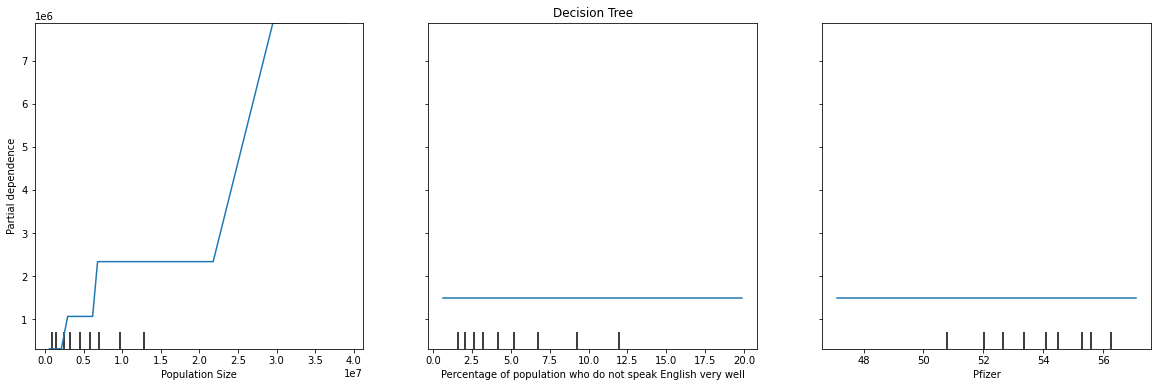

In [89]:
from sklearn.inspection import PartialDependenceDisplay

# tree_disp = PartialDependenceDisplay.from_estimator(tuple_data[0], final_table, ["Percent White", "tot_death"],ax=ax)
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title("Decision Tree")
x=final_table.drop(['tot_cases', 'tot_death'],axis=1)
final_table.columns
tree_disp = PartialDependenceDisplay.from_estimator(tuple_data[0],x, ["Population Size", "Percentage of population who do not speak English very well","Pfizer"], ax=ax)
# ,"Percentage of Population Below Poverty Line"], ax=ax)

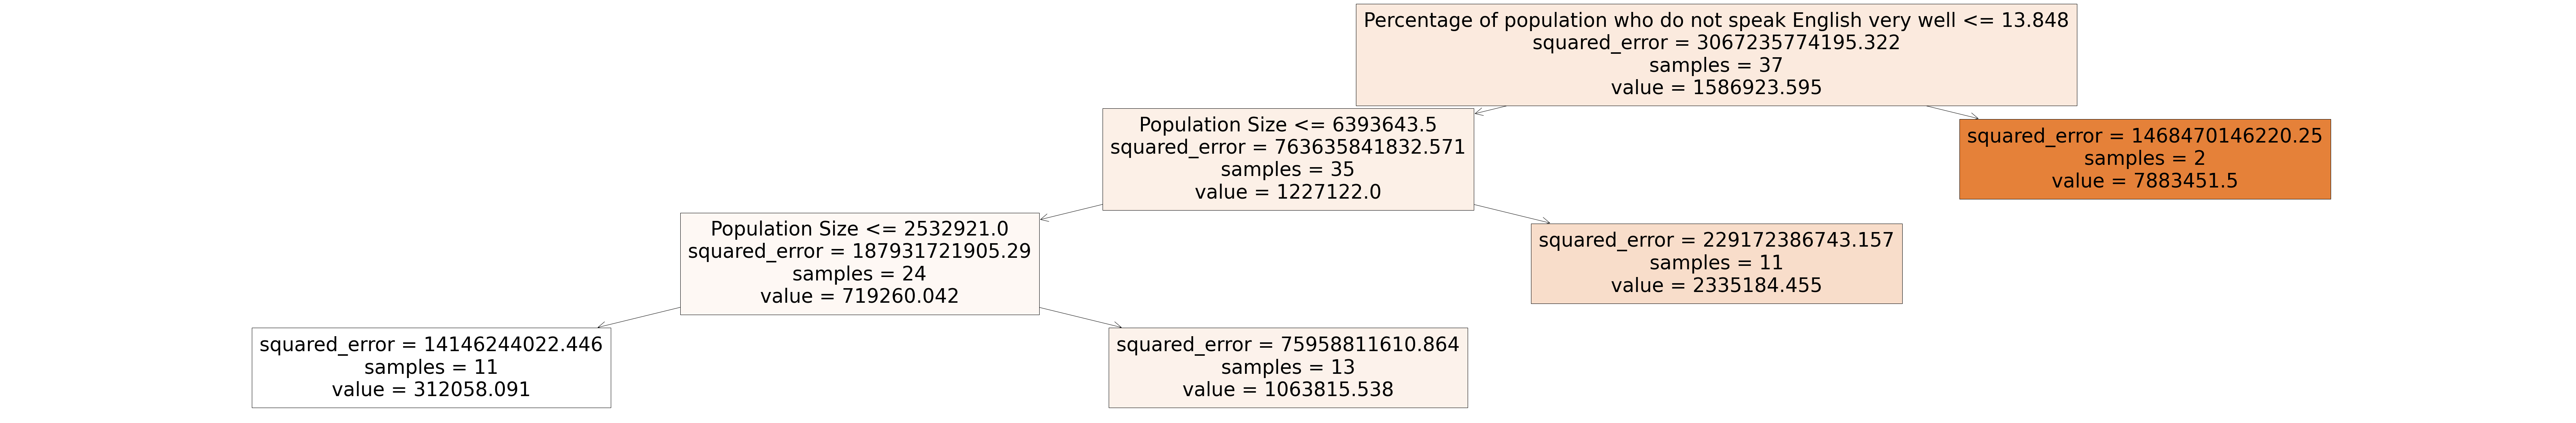

In [90]:
from sklearn.tree import plot_tree
fig3, ax = plt.subplots(figsize=(120, 20))
plt3 = plot_tree(tree_sq, ax=ax, feature_names=final_table.columns,class_names=["blue","green"],filled=True)

# Decision Tree Regression Model (Total Deaths)

In [91]:
y_deaths = final_table['tot_death']

tree_ab = DecisionTreeRegressor(criterion='absolute_error',max_depth=None,min_samples_split=2)
# default = Minimum squared error
tree_sq = DecisionTreeRegressor(max_depth=None,min_samples_split=2)
tree_fr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=None,min_samples_split=2)
tree_po = DecisionTreeRegressor(criterion='poisson',max_depth=None,min_samples_split=2)

x_scaler = StandardScaler()

pipe_l = Pipeline([
        ('scaler', x_scaler),
        ('regressor', DecisionTreeRegressor(criterion='squared_error',max_depth=None,min_samples_split=2))
        ])


regr = pipe_l

def Average_(lst):
    return sum(lst) / len(lst)

def process_death(iter,max_depth_list):

  # Intialize the average  
  avg_po = []
  avg_fr = []
  avg_sq = []
  avg_ab = []
  cntr=0
  for k in max_depth_list:
    vals_ab = []
    vals_sq = []
    vals_fr = []
    vals_po = []
    tree_ab.min_samples_split=k;tree_sq.min_samples_split=k;tree_fr.min_samples_split=k;tree_po.min_samples_split=k;
    regr.set_params(regressor__min_samples_split=k)
    for i in range(iter):
      x_train_death, x_test_death, y_train_death, y_test_death = train_test_split(x, y_case, test_size = 0.25,random_state=i)
      def r2x(regr, x_train_case, y_train_case):
        return r2_score(y_train_case, regr.predict(x_train_case))
      tree_ab.fit(x_train_death,y_train_death)
      tree_sq.fit(x_train_death,y_train_death)
      tree_fr.fit(x_train_death,y_train_death)
      tree_po.fit(x_train_death,y_train_death)
      regr.fit(x_train_death,y_train_death,)


      ypred_death_ab = tree_ab.predict(x_test_death)
      ypred_death_po = tree_po.predict(x_test_death)
      ypred_death_fr = tree_fr.predict(x_test_death)
      ypred_death_sq = regr.predict(x_test_death)


      rmse_death_ab = r2_score(y_test_death, ypred_death_ab)
      rmse_death_sq = r2_score(y_test_death, ypred_death_sq)
      rmse_death_fr = r2_score(y_test_death, ypred_death_fr)
      rmse_death_po = r2_score(y_test_death, ypred_death_po)
      #print ("MSE Abs: Sq:  Fr:  Poisson:", rmse_case_ab, rmse_case_sq, rmse_case_fr, rmse_case_po)
      vals_ab.append(rmse_death_ab)
      vals_sq.append(rmse_death_sq)
      vals_fr.append(rmse_death_fr)
      vals_po.append(rmse_death_po)
    if cntr == 0:
      cntr = cntr+1
      print("Abs err\t\t   Sq err\t\t   Fr Sq err\t\t   Poisson deviance\t\n")      
    print(Average_(vals_ab), Average_(vals_sq), Average_(vals_fr), Average_(vals_po))
    avg_ab.append(Average_(vals_ab))
    avg_fr.append(Average_(vals_sq))
    avg_sq.append(Average_(vals_fr))
    avg_po.append(Average_(vals_po))
  feature_importance_deaths = permutation_importances(regr, x_train_death, y_train_death, r2x)
  print(feature_importance_deaths)
  
  return regr,avg_ab,avg_sq,avg_fr,avg_po

minsamplesplit = [2,3,4,6,10,11,15,20]

tuple_data=process_death(500,minsamplesplit)

Abs err		   Sq err		   Fr Sq err		   Poisson deviance	

0.33486455415154914 0.41642818478995186 0.4904084647312499 -1.267330651787691
0.34270357512834426 0.4614843050246231 0.4388415198496199 -1.1512346797480502
0.4930219770979505 0.5019606522421572 0.46780385657093576 -1.017003691790108
0.46325997956602216 0.4925633718479294 0.4820155063790396 -0.8889289007832183
0.4640202628912578 0.4807796256625041 0.48351559603635136 -1.3946434783277353
0.4527395035699736 0.48028065970916967 0.4651846671145395 -1.166832443671237
0.4010504249534604 0.4495386597744447 0.44251319662754146 -1.083610163746718
0.30047663106966177 0.3524766471616784 0.34243828599324444 -1.2380952634449653
                                                    Importance
Feature                                                       
Population Size                                       1.977673
Pfizer                                                0.000000
Percent of Vote for Democratic Party                  0.000000
Percent

/usr/local/lib/python3.7/dist-packages/sklearn/inspection/_plot/partial_dependence.py:1110: UserWarning: Attempting to set identical bottom == top == 1492484.4174825177 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])
/usr/local/lib/python3.7/dist-packages/sklearn/inspection/_plot/partial_dependence.py:1110: UserWarning: Attempting to set identical bottom == top == 1492484.4174825177 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])


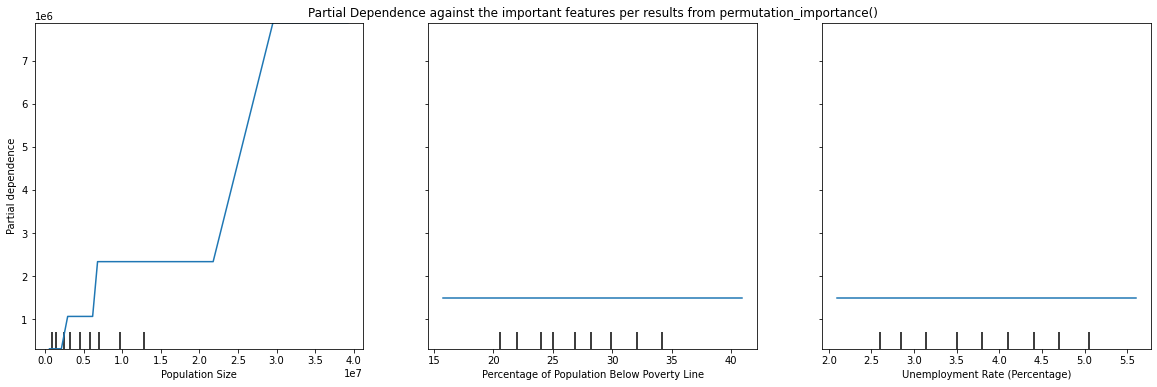

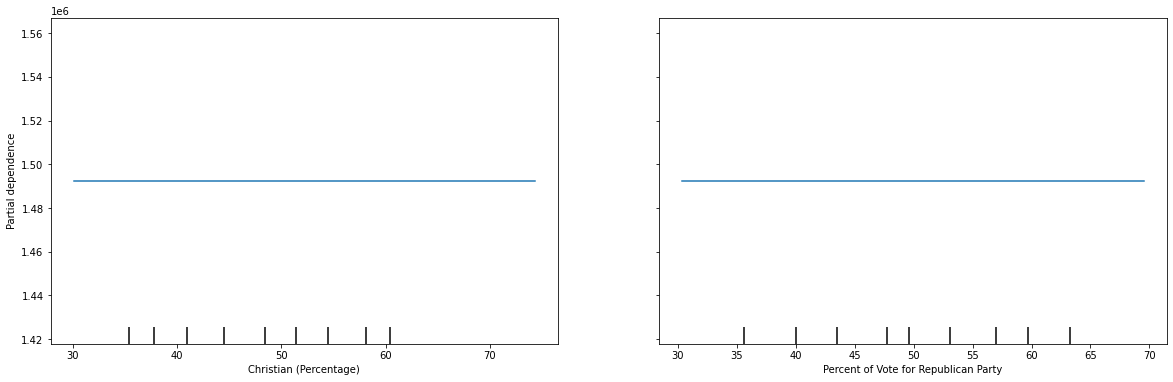

In [92]:
from sklearn.inspection import PartialDependenceDisplay


fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title("Partial Dependence against the important features per results from permutation_importance()")
x=final_table.drop(['tot_cases', 'tot_death'],axis=1)
tree_disp = PartialDependenceDisplay.from_estimator(tuple_data[0],x, ["Population Size", "Percentage of Population Below Poverty Line", "Unemployment Rate (Percentage)"], ax=ax)
fig2, ax2 = plt.subplots(figsize=(20, 6))
tree_disp2 = PartialDependenceDisplay.from_estimator(tuple_data[0],x, ["Christian (Percentage)","Percent of Vote for Republican Party"], ax=ax2)



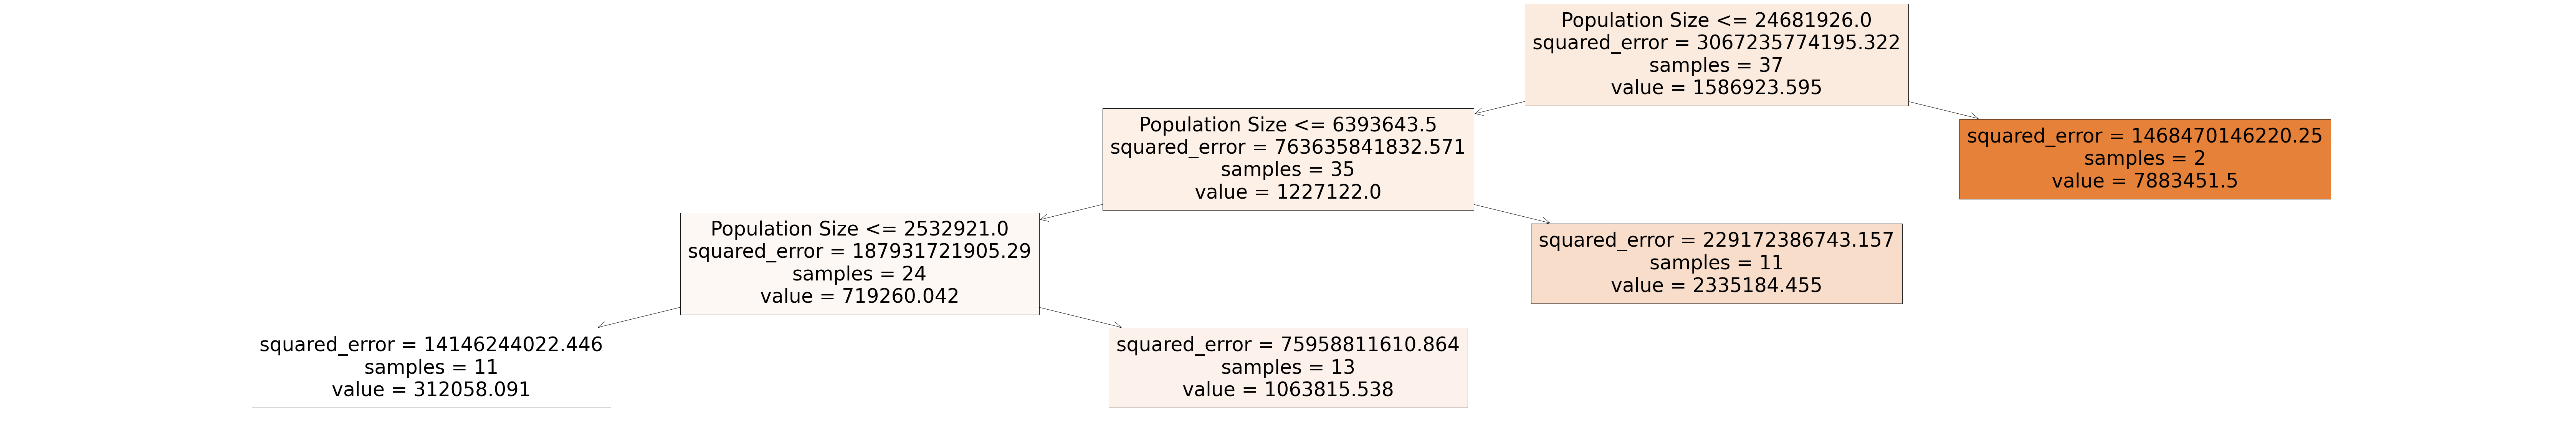

In [93]:
from sklearn.tree import plot_tree
fig3, ax = plt.subplots(figsize=(120, 20))
tree_sq.max_depth=10
plt3 = plot_tree(tree_sq, ax=ax, feature_names=final_table.columns,class_names=["blue","green"],filled=True)

# Creating New Comprehensive Table without Population Size

In [94]:
#Create a comprehensive table
final_table_no_pop = pd.concat([vaccine_percentage_results, health_insurance_data, religion_data, life_expectancy_data, voting_rates_data, unemployment_rates_data, below_poverty_line_data, language_data, population_density_data, diversity_data, political_party_data, Total_Cases, Total_Deaths], axis=1, join="inner")
final_table_no_pop

,Moderna,Pfizer,Janssen,Population Insured (Percentage),Christian (Percentage),Jewish (Percentage),Average Life Expectancy (years),Voting Rates (Percentage),Unemployment Rate (Percentage),Percentage of Population Below Poverty Line,...,Population per Square Mile,Percent White,Percent Black or African American,"Percent American Indian, Alaska Native",Percent Asian,Percent Native Hawaiian and Other Pacific Islander,Percent of Vote for Democratic Party,Percent of Vote for Republican Party,tot_cases,tot_death
Alabama,43.191712,49.933525,4.763014,85.2,54.4,0.2,75.2,59.6,3.0,33.0,...,94.4,68.5,26.2,0.6,1.1,0.1,36.569990,62.031643,1295625,19467
Alaska,39.208796,51.078225,6.024070,81.0,33.6,0.9,77.7,62.4,5.4,28.3,...,1.2,66.7,3.3,14.8,5.4,1.0,42.771952,52.833143,239750,1195
Arizona,39.416378,53.806403,4.667957,82.0,37.9,1.7,78.8,64.7,3.6,29.7,...,56.3,73.0,4.1,4.6,2.8,0.2,49.364691,49.055981,2007180,29268
Arkansas,42.109284,50.635820,4.910220,81.6,56.7,0.1,75.7,51.9,3.1,33.4,...,56.0,77.0,15.4,0.8,1.2,0.2,34.775062,62.395730,833029,11237
California,37.717832,55.571791,4.736785,82.1,42.3,3.3,80.9,55.7,5.4,27.1,...,239.1,57.6,6.2,1.0,13.0,0.4,63.483947,34.320724,9095256,88207
Colorado,38.632582,54.887706,4.422428,86.3,37.3,1.8,80.0,62.7,4.0,21.9,...,48.5,81.3,4.0,1.1,2.8,0.1,55.011067,41.604126,1357240,11977
Connecticut,38.819627,54.492597,4.615547,91.9,53.7,3.3,80.3,60.5,4.9,22.7,...,738.1,77.6,10.1,0.3,3.8,0.0,59.260732,39.187118,737276,10779
Delaware,39.238010,54.350344,4.537981,89.2,38.2,1.7,78.1,63.8,4.6,29.1,...,460.8,68.9,21.4,0.5,3.2,0.0,58.743006,39.774877,259746,2846
Florida,37.982403,54.353314,5.615688,78.5,36.9,3.3,79.0,56.4,3.3,32.3,...,350.6,75.0,16.0,0.4,2.4,0.1,47.861451,51.219820,5853067,73589
Georgia,39.998891,53.477084,4.439494,80.8,43.1,1.3,77.4,60.9,3.2,31.9,...,168.4,59.7,30.5,0.3,3.2,0.1,49.473056,49.237474,2500259,37057


# Multiple Linear Regression Model (Total Cases without Population Size)

In [95]:
#Define the independent (x) and dependent (y) variables
x_no_pop = final_table_no_pop.drop(['tot_cases', 'tot_death'],axis=1)
y_case_no_pop = final_table['tot_cases']

In [98]:
#Split training and testing data
x_train_no_pop, x_test_no_pop, y_train_case_no_pop, y_test_case_no_pop = train_test_split(x_no_pop, y_case_no_pop, test_size = 0.25, random_state = 42)

In [110]:
#Create the linear Regression model and fit the training data
LR_case_no_pop = LinearRegression()
LR_case_no_pop.fit(x_train_no_pop,y_train_case_no_pop)

LinearRegression()

In [111]:
#Use the linear regression model to predict the y_test values
y_prediction_case_no_pop =  LR_case_no_pop.predict(x_test_no_pop)
y_prediction_case_no_pop

array([ 911131.78260754, 1921882.93652259, -738741.1332843 ,
       1535001.8519894 , 1519784.46150018, 1384140.28682844,
       1341500.949661  ,  -38164.51400372, 1378966.60283279,
         26587.93021072, 2622393.57564619, 4015731.98221804,
        191358.87584713])

In [112]:
#Determine the accuracy of the linear regression model
score_case_no_pop=r2_score(y_test_case_no_pop,y_prediction_case_no_pop)
print("R squared Value: ",score_case_no_pop)
print("Mean Squared Error Value",mean_squared_error(y_test_case_no_pop,y_prediction_case_no_pop))
print("Root Mean Squared Error Value",np.sqrt(mean_squared_error(y_test_case_no_pop,y_prediction_case_no_pop)))

R squared Value:  0.3777919848308785
Mean Squared Error Value 2975011474131.302
Root Mean Squared Error Value 1724822.157247321


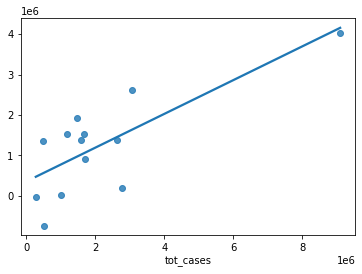

In [113]:
#Plot y_test vs. y_prediction
sn.regplot(x=y_test_case_no_pop, y=y_prediction_case_no_pop, ci=None)

# Multiple Linear Regression Model (Total Deaths without Population Size)

In [114]:
#Define the independent (x) and dependent (y) variables
x = final_table_no_pop.drop(['tot_cases', 'tot_death'],axis=1)
y_death_no_pop = final_table['tot_death']

In [115]:
#Split training and testing data
x_train_no_pop, x_test_no_pop, y_train_death_no_pop, y_test_death_no_pop = train_test_split(x_no_pop, y_death_no_pop, test_size = 0.25, random_state = 42)

In [116]:
#Create the linear Regression model and fit the training data
LR_death_no_pop = LinearRegression()
LR_death_no_pop.fit(x_train_no_pop,y_train_death_no_pop)

LinearRegression()

In [117]:
#Use the linear regression model to predict the y_test values
y_prediction_death_no_pop =  LR_death_no_pop.predict(x_test_no_pop)
y_prediction_death_no_pop

array([ 8764.89129213, 28174.6539403 , -7283.77154342, 18656.57848162,
       21779.4639856 , 17302.78804621, 12350.54023886,  2520.78268039,
       19247.12399772,   732.05566155, 31499.17072776, 47700.483211  ,
        5024.92226037])

In [118]:
#Determine the accuracy of the linear regression model
score_death_no_pop=r2_score(y_test_death_no_pop,y_prediction_death_no_pop)
print("R squared Value: ",score_death_no_pop)
print("Mean Squared Error Value",mean_squared_error(y_test_death_no_pop,y_prediction_death_no_pop))
print("Root Mean Squared Error Value",np.sqrt(mean_squared_error(y_test_death_no_pop,y_prediction_death_no_pop)))

R squared Value:  0.33633470477781735
Mean Squared Error Value 312372743.8395918
Root Mean Squared Error Value 17674.069815398823


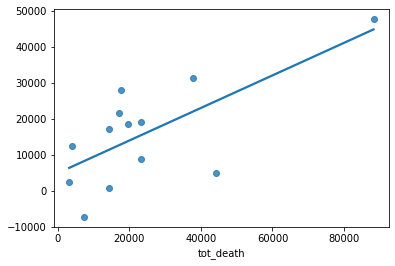

In [119]:
#Plot y_test vs. y_prediction
sn.regplot(x=y_test_death_no_pop, y=y_prediction_death_no_pop, ci=None)

# Random Forest Regression Model (Total Cases without Population Size)

In [204]:
#Define the independent (x) and dependent (y) variables
x_no_pop = final_table_no_pop.drop(['tot_cases', 'tot_death'],axis=1)
y_case_no_pop = final_table_no_pop['tot_cases']

In [205]:
#Split training and testing data
x_train_no_pop, x_test_no_pop, y_train_case_no_pop, y_test_case_no_pop = train_test_split(x_no_pop, y_case_no_pop, test_size = 0.25, random_state = 42)

In [206]:
#Look at the shapes of your teating and training features and labels
print('x_train_no_pop Shape:', x_train_no_pop.shape)
print('y_train_case_no_pop Shape:', y_train_case_no_pop.shape)
print('x_test_no_pop Shape:', x_test_no_pop.shape)
print('y_test_case_no_pop Shape:', y_test_case_no_pop.shape)

x_train_no_pop Shape: (37, 19)
y_train_case_no_pop Shape: (37,)
x_test_no_pop Shape: (13, 19)
y_test_case_no_pop Shape: (13,)


In [207]:
#Use a for loop to create a list of decision tree classifiers all fitted to the training set that have varying n_estimators values 
trees = []
for d in range (1,65):
    trees.append(RandomForestRegressor(random_state=42, n_estimators=d).fit(x_train_no_pop, y_train_case_no_pop.ravel()))

In [208]:
#Use a function to look at the accuracy scores for the training and testing sets at each specific n_estimators value
def score(tree, x_no_pop, y_case_no_pop):
    return (tree.score(x_no_pop, y_case_no_pop))
for t in trees:
    print("For number of estimators equal to {}".format(t.get_params()["n_estimators"]))
    print("\tAccuracy on training set: {}".format(score(t, x_train_no_pop, y_train_case_no_pop)))
    print("\tAccuracy on test set: {}".format(score(t, x_test_no_pop, y_test_case_no_pop)))

For number of estimators equal to 1
	Accuracy on training set: 0.6012863972490861
	Accuracy on test set: -0.32458129485504505
For number of estimators equal to 2
	Accuracy on training set: 0.7709843660856299
	Accuracy on test set: 0.4190374335374596
For number of estimators equal to 3
	Accuracy on training set: 0.889700724657901
	Accuracy on test set: 0.3359123798315574
For number of estimators equal to 4
	Accuracy on training set: 0.8179657636372127
	Accuracy on test set: 0.25597689348695785
For number of estimators equal to 5
	Accuracy on training set: 0.8600570280197734
	Accuracy on test set: 0.24750079339683517
For number of estimators equal to 6
	Accuracy on training set: 0.8565759756541863
	Accuracy on test set: 0.17375513856165714
For number of estimators equal to 7
	Accuracy on training set: 0.8795573942981968
	Accuracy on test set: 0.16714007127531083
For number of estimators equal to 8
	Accuracy on training set: 0.8481194973377072
	Accuracy on test set: 0.11770256294803783
Fo

In [209]:
#Use a for loop to create a list of decision tree regressors all fitted to the training set that have varying max_depth values 
trees = []
for d in [1,2,3,4,5,6]:
    trees.append(RandomForestRegressor(random_state=42, n_estimators=2, max_depth=d).fit(x_train_no_pop, y_train_case_no_pop.ravel()))

In [210]:
#Use a function to look at the accuracy scores for the training and testing sets at each specific max_depth value
def score(tree, x_no_pop, y_case_no_pop):
    return (tree.score(x_no_pop, y_case_no_pop))
for t in trees:
    print("For max depth equal to {}".format(t.get_params()["max_depth"]))
    print("\tAccuracy on training set: {}".format(score(t, x_train_no_pop, y_train_case_no_pop)))
    print("\tAccuracy on test set: {}".format(score(t, x_test_no_pop, y_test_case_no_pop)))

For max depth equal to 1
	Accuracy on training set: 0.44818887391620943
	Accuracy on test set: 0.41164369985365457
For max depth equal to 2
	Accuracy on training set: 0.6719133687625873
	Accuracy on test set: 0.4769135266843697
For max depth equal to 3
	Accuracy on training set: 0.7499617372513466
	Accuracy on test set: 0.4318900740652193
For max depth equal to 4
	Accuracy on training set: 0.7580834972686624
	Accuracy on test set: 0.4677918915081559
For max depth equal to 5
	Accuracy on training set: 0.7820216332711112
	Accuracy on test set: 0.45757264722132174
For max depth equal to 6
	Accuracy on training set: 0.7803427694390865
	Accuracy on test set: 0.45651327348720727


In [211]:
#Use a random forest regressor with the ideal parameters to make the various decision trees
RFR_case_no_pop = RandomForestRegressor(n_estimators=2, max_depth=2, random_state=42)
RFR_case_no_pop.fit(x_train_no_pop, y_train_case_no_pop.ravel())

RandomForestRegressor(max_depth=2, n_estimators=2, random_state=42)

In [213]:
# Predict the case numbers for the x_test set
y_prediction_case_no_pop = RFR_case_no_pop.predict (x_test_no_pop)
y_prediction_case_no_pop

array([1538840.14166667, 1941517.375     ,  411497.58125   ,
       1941517.375     , 1941517.375     , 1538840.14166667,
       1538840.14166667,  411497.58125   , 1941517.375     ,
       1941517.375     , 1941517.375     , 3968859.16666667,
       1538840.14166667])

In [214]:
#Assess the accuracy of the random forest regression
r2_score (y_test_case_no_pop, y_prediction_case_no_pop)

0.4769135266843697

In [215]:
#Determine the most important features using permutation feature importance
def r2(RFR_case_no_pop, x_train_no_pop, y_train_case_no_pop):
    return r2_score(y_train_case_no_pop, RFR_case_no_pop.predict(x_train_no_pop))

feature_importance_case_no_pop = permutation_importances(RFR_case_no_pop, x_train_no_pop, y_train_case_no_pop, r2)
feature_importance_case_no_pop

,Importance
Feature,
Percentage of population who do not speak English very well,0.375358
Percent Black or African American,0.343423
Population Insured (Percentage),0.173713
Moderna,0.000000
Percent of Vote for Democratic Party,0.000000
Percent Native Hawaiian and Other Pacific Islander,0.000000
Percent Asian,0.000000
"Percent American Indian, Alaska Native",0.000000
Percent White,0.000000


# Random Forest Regression Model (Total Deaths without Population Size)

In [216]:
#Define the independent (x) and dependent (y) variables
x_no_pop = final_table_no_pop.drop(['tot_cases', 'tot_death'],axis=1)
y_death_no_pop = final_table_no_pop['tot_death']

In [217]:
#Split training and testing data
x_train_no_pop, x_test_no_pop, y_train_death_no_pop, y_test_death_no_pop = train_test_split(x_no_pop, y_death_no_pop, test_size = 0.25, random_state = 42)

In [218]:
#Look at the shapes of your teating and training features and labels
print('x_train_no_pop Shape:', x_train_no_pop.shape)
print('y_train_case_no_pop Shape:', y_train_death_no_pop.shape)
print('x_test_no_pop Shape:', x_test_no_pop.shape)
print('y_test_case_no_pop Shape:', y_test_death_no_pop.shape)

x_train_no_pop Shape: (37, 19)
y_train_case_no_pop Shape: (37,)
x_test_no_pop Shape: (13, 19)
y_test_case_no_pop Shape: (13,)


In [219]:
#Use a for loop to create a list of decision tree regressors all fitted to the training set that have varying n_estimators values 
trees = []
for d in range (1,65):
    trees.append(RandomForestRegressor(random_state=42, n_estimators=d).fit(x_train_no_pop, y_train_death_no_pop.ravel()))

In [220]:
#Use a function to look at the accuracy scores for the training and testing sets at each specific n_estimators value
def score(tree, x_no_pop, y_death_no_pop):
    return (tree.score(x_no_pop, y_death_no_pop))
for t in trees:
    print("For number of estimators equal to {}".format(t.get_params()["n_estimators"]))
    print("\tAccuracy on training set: {}".format(score(t, x_train_no_pop, y_train_death_no_pop)))
    print("\tAccuracy on test set: {}".format(score(t, x_test_no_pop, y_test_death_no_pop)))

For number of estimators equal to 1
	Accuracy on training set: 0.5063163644668296
	Accuracy on test set: -0.2878487947542414
For number of estimators equal to 2
	Accuracy on training set: 0.7860671661977962
	Accuracy on test set: -0.23658568713055628
For number of estimators equal to 3
	Accuracy on training set: 0.8875051988135922
	Accuracy on test set: -0.1965640529109256
For number of estimators equal to 4
	Accuracy on training set: 0.8310253998315197
	Accuracy on test set: -0.0937965537331682
For number of estimators equal to 5
	Accuracy on training set: 0.8378500489642433
	Accuracy on test set: -0.12207113406121706
For number of estimators equal to 6
	Accuracy on training set: 0.8432277221195456
	Accuracy on test set: -0.07552196208483175
For number of estimators equal to 7
	Accuracy on training set: 0.8723302057141621
	Accuracy on test set: 0.03723638020924003
For number of estimators equal to 8
	Accuracy on training set: 0.8859051404002936
	Accuracy on test set: 0.064921807027148

In [221]:
#Use a for loop to create a list of decision tree regressors all fitted to the training set that have varying max_depth values 
trees = []
for d in [1,2,3,4,5,6,7,8,9]:
    trees.append(RandomForestRegressor(random_state=42, n_estimators=17, max_depth=d).fit(x_train_no_pop, y_train_death_no_pop.ravel()))

In [222]:
#Use a function to look at the accuracy scores for the training and testing sets at each specific max_depth value
def score(tree, x_no_pop, y_death_no_pop):
    return (tree.score(x_no_pop, y_death_no_pop))
for t in trees:
    print("For max depth equal to {}".format(t.get_params()["max_depth"]))
    print("\tAccuracy on training set: {}".format(score(t, x_train_no_pop, y_train_death_no_pop)))
    print("\tAccuracy on test set: {}".format(score(t, x_test_no_pop, y_test_death_no_pop)))

For max depth equal to 1
	Accuracy on training set: 0.5434166432703862
	Accuracy on test set: 0.17422170547077198
For max depth equal to 2
	Accuracy on training set: 0.7246632774750794
	Accuracy on test set: 0.26876554747063475
For max depth equal to 3
	Accuracy on training set: 0.8039181654995569
	Accuracy on test set: 0.26112146754274146
For max depth equal to 4
	Accuracy on training set: 0.8507084987370009
	Accuracy on test set: 0.2708698461142882
For max depth equal to 5
	Accuracy on training set: 0.8486820315126201
	Accuracy on test set: 0.2913122965685194
For max depth equal to 6
	Accuracy on training set: 0.8640029234944047
	Accuracy on test set: 0.3058743372587207
For max depth equal to 7
	Accuracy on training set: 0.8540725987318292
	Accuracy on test set: 0.34483621057820724
For max depth equal to 8
	Accuracy on training set: 0.8727808807441988
	Accuracy on test set: 0.38129505870033453
For max depth equal to 9
	Accuracy on training set: 0.8709805101645209
	Accuracy on test se

In [223]:
#Use a random forest regressor with the ideal parameters to make the various decision trees
RFR_death_no_pop = RandomForestRegressor(n_estimators=17, max_depth=8, random_state=42)
RFR_death_no_pop.fit(x_train_no_pop, y_train_death_no_pop.ravel())

RandomForestRegressor(max_depth=8, n_estimators=17, random_state=42)

In [224]:
# Predict the case numbers for the x_test set
y_prediction_death_no_pop = RFR_death_no_pop.predict (x_test_no_pop)
y_prediction_death_no_pop

array([19626.44705882, 21359.40784314, 22647.47058824, 24255.50588235,
       12231.30980392, 13833.79411765,  9875.02941176,  3564.41176471,
       17511.56470588, 21393.58823529, 24645.32941176, 36049.76470588,
       22604.69215686])

In [225]:
#Assess the accuracy of the random forest regression
r2_score (y_test_death_no_pop, y_prediction_death_no_pop)

0.38129505870033453

In [226]:
#Determine the most important features using permutation feature importance
def r2(RFR_death_no_pop, x_train_no_pop, y_train_death_no_pop):
    return r2_score(y_train_death_no_pop, RFR_death_no_pop.predict(x_train_no_pop))

feature_importance_death_no_pop = permutation_importances(RFR_death_no_pop, x_train_no_pop, y_train_death_no_pop, r2)
feature_importance_death_no_pop

,Importance
Feature,
Percent Black or African American,0.556745
Population Insured (Percentage),0.307583
Percent of Vote for Democratic Party,0.036297
Percent White,0.032939
Janssen,0.030530
"Percent American Indian, Alaska Native",0.029268
Voting Rates (Percentage),0.028322
Christian (Percentage),0.024385
Percent Asian,0.021138
